In [94]:
# Importação das bibliotecas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [95]:
#Importação dos dados
ocorrencia = pd.read_csv('/content/ocorrencia.csv',  sep = ';',error_bad_lines=False)
recomendacao = pd.read_csv('/content/recomendacao.csv',  sep = ';',error_bad_lines=False)
ocorrencia_tipo = pd.read_csv('/content/ocorrencia_tipo.csv',  sep = ';',error_bad_lines=False)
aeronave = pd.read_csv('/content/aeronave.csv',  sep = ';',error_bad_lines=False)
fator_contribuinte = pd.read_csv('/content/fator_contribuinte.csv',  sep = ';',error_bad_lines=False)

In [96]:
#Ocorrência com aeronave
ocorrencia =   pd.merge(ocorrencia, aeronave[['codigo_ocorrencia2','aeronave_nivel_dano','aeronave_tipo_veiculo']], how = 'inner', on = 'codigo_ocorrencia2')

In [97]:
#Tipos de ocorrências
ocorrencia= pd.merge(ocorrencia, ocorrencia_tipo[['codigo_ocorrencia1','ocorrencia_tipo']], how = 'inner', on = 'codigo_ocorrencia1')

In [ ]:
#!pip install pycaret
#!pip install Jinja2
#!pip install markupsafe==2.0.1

In [98]:
from pycaret.classification import *

In [99]:
ocorrencia.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_nivel_dano',
       'aeronave_tipo_veiculo', 'ocorrencia_tipo'],
      dtype='object')

In [101]:
dados = ocorrencia[[ 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
        'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_nivel_dano',
       'aeronave_tipo_veiculo', 'ocorrencia_tipo']]
dados = dados.dropna()     

In [102]:
dados.count()

ocorrencia_classificacao          3862
ocorrencia_latitude               3862
ocorrencia_longitude              3862
ocorrencia_cidade                 3862
ocorrencia_uf                     3862
ocorrencia_pais                   3862
ocorrencia_aerodromo              3862
ocorrencia_hora                   3862
investigacao_aeronave_liberada    3862
investigacao_status               3862
divulgacao_relatorio_numero       3862
divulgacao_relatorio_publicado    3862
total_recomendacoes               3862
total_aeronaves_envolvidas        3862
ocorrencia_saida_pista            3862
aeronave_nivel_dano               3862
aeronave_tipo_veiculo             3862
ocorrencia_tipo                   3862
dtype: int64

In [ ]:
# Preparação dos dados antes do treinamento
s = setup(data = dados, target='ocorrencia_classificacao', train_size=0.75, normalize=True, normalize_method="minmax")

In [104]:
best = compare_models(n_select = 3, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9016,0.9810,0.8224,0.8971,0.8933,0.8366,0.8403,2.126
et,Extra Trees Classifier,0.9040,0.9806,0.8342,0.8997,0.8980,0.8413,0.8438,2.679
lr,Logistic Regression,0.9075,0.9805,0.8457,0.9038,0.9033,0.8477,0.8494,6.158
gbc,Gradient Boosting Classifier,0.9009,0.9794,0.8261,0.8967,0.8940,0.8360,0.8391,19.963
lightgbm,Light Gradient Boosting Machine,0.9009,0.9776,0.8516,0.9001,0.8997,0.8387,0.8393,0.459
knn,K Neighbors Classifier,0.8636,0.9539,0.7517,0.8500,0.8439,0.7704,0.7784,6.301
ada,Ada Boost Classifier,0.8864,0.9445,0.7962,0.8790,0.8754,0.8108,0.8154,1.851
dt,Decision Tree Classifier,0.8971,0.9234,0.8438,0.8956,0.8957,0.8323,0.8329,0.282
lda,Linear Discriminant Analysis,0.7050,0.7628,0.6548,0.7019,0.7024,0.6445,0.6453,11.844
qda,Quadratic Discriminant Analysis,0.6088,0.7391,0.6050,0.7492,0.6429,0.4211,0.4478,3.577


In [108]:
model = create_model('rf', fold = 5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8897,0.9748,0.8140,0.8819,0.8833,0.8175,0.8193
1,0.8998,0.9830,0.8217,0.8939,0.8917,0.8337,0.8370
2,0.9050,0.9801,0.8372,0.8994,0.8995,0.8432,0.8450
3,0.9119,0.9792,0.8317,0.9105,0.9032,0.8536,0.8585
4,0.9033,0.9828,0.8139,0.9017,0.8919,0.8381,0.8441
Mean,0.9019,0.9800,0.8237,0.8974,0.8939,0.8372,0.8408
Std,0.0073,0.0030,0.0094,0.0094,0.0069,0.0119,0.0128


In [109]:
tuned_et = tune_model(model,fold = 5,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8741,0.9698,0.8256,0.8781,0.8760,0.7966,0.7968
1,0.9016,0.9745,0.8457,0.8978,0.8992,0.8391,0.8394
2,0.8998,0.9733,0.8585,0.9012,0.9005,0.8379,0.8379
3,0.8929,0.9743,0.8379,0.8913,0.8914,0.8259,0.8266
4,0.8981,0.9798,0.8390,0.8938,0.8951,0.8326,0.8333
Mean,0.8933,0.9743,0.8413,0.8924,0.8924,0.8264,0.8268
Std,0.0100,0.0032,0.0108,0.0079,0.0088,0.0156,0.0157


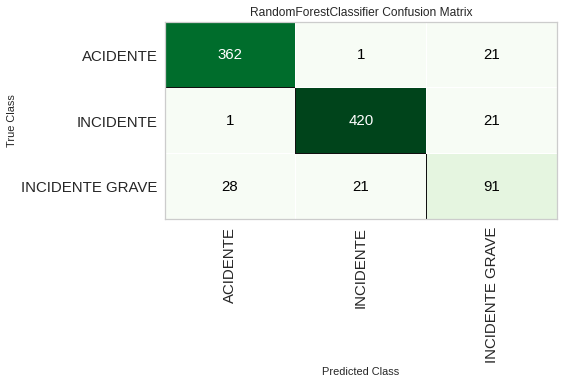

In [110]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [92]:
ocor_predict = predict_model(tuned_et, data=dados)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0,0.9777,0,0,0,0,0


In [111]:
ocor_predict["Label"].value_counts()

INCIDENTE          1854
ACIDENTE           1558
INCIDENTE GRAVE     450
Name: Label, dtype: int64

In [ ]:
final = finalize_model(tuned_et)